# Constant Force Simulation Plotting Scripts (Visualization of plots in post).
Uses saved data combining replicas to visualize plots with matplotlib.

In [35]:
import sys
import numpy as np
import scipy as sc
import os
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
from random import randint
from array import *
import fileinput
import itertools
import linecache
from itertools import islice
from scipy.spatial import distance
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy import signal
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import seaborn as sn
%matplotlib inline

from numpy import linalg as LA

#Don't show figures, only save:
#mpl.use('Agg')

#Width and height of axes.
w=2
h=2
plt.rcParams.update({'font.size': 12, 'figure.figsize': [w,h]})

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
if not os.path.exists('VisPlots'):
    os.makedirs('VisPlots')
    
if not os.path.exists('VisPlots/ContactMaps'):
    os.makedirs('VisPlots/ContactMaps')
    
if not os.path.exists('VisPlots/DiffMaps'):
    os.makedirs('VisPlots/DiffMaps')

In [36]:
# Variables:
numBeads = 738
numReps = 40
jobName = 'CF0m'
Time_Label = '0m'
eqBlocks = 15000 #Number of simulation blocks to skip before recording pull coordinate for histograms.

forcenum = 4
forcejump = .2
timestep=.01
blockSize = 100


MainFigForceNums = [0,3]

dt = timestep*blockSize
forces = np.arange(0,forcejump*forcenum+forcejump, forcejump)
forces = np.around(forces, 5)

NoForcePullCoordFName = 'Native_Pull_Coord.txt'

def makeEnerFName(forcenum):
    return 'MeanEner_' + str(forcenum) + '.dat'

def makeContMapFName(forcenum):
    return 'Prob_' + str(forcenum) + '.dat'

def makeCosFName(forcenum):
    return 'CosDict_'+str(forcenum)+'.txt'

def makeMSDFName(forcenum):
    return 'CF_'+str(forcenum)+'_MSD.txt'
    
def makePullCoordFName(forcenum):
    return 'CF_'+str(forcenum)+'_Pull_Coord.txt'

def makeReleasePullCoordFName(forcenum):
    return 'Release_'+str(forcenum)+'_Pull_Coord.txt'

def makeSingleJobName(forcenum):
    return 'CF0m_'+str(forcenum)

In [37]:
#List of Colors:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab: gray', 'tab:olive', 'tab:cyan']

In [38]:
#Helper Function for setting figure size by axis size.
#set_size(w,h,ax)
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

# Contact Map and P vs D:

0.9983451686886037 0.0004660052056691294
0.9983451686886037 0.0005015036378751033
0.9983451686886037 0.0004825203943644863
0.9983451686886037 0.00018298797445224975
0.9983451686886037 3.021384108307718e-05


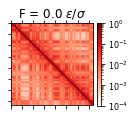

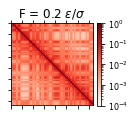

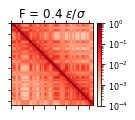

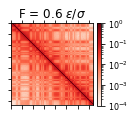

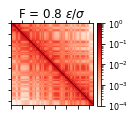

In [39]:
#Contact Maps:
AllProbs = []
for curfnum in range(forcenum+1):
    
    singlejobname = makeSingleJobName(curfnum)
    filename = 'CF0m_'+str(curfnum)+'-Dist-all.dat'
    r=np.genfromtxt('PlotData/'+filename,dtype='f8', delimiter=' ')
    
    l=numBeads

    print(r.max(),r.min())
    sys.stdout.flush()

    fig, ax = plt.subplots()
    pos = ax.matshow(r,norm=mpl.colors.LogNorm(vmin=0.0001, vmax=1),cmap="Reds")
    cbar = fig.colorbar(pos, ax = ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8) 
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    curforce = round(curfnum*forcejump,4)
    ax.set_title('F = ' + str(curforce) + r' $\epsilon/\sigma$')
    set_size(1.25,1.25,ax)
    fig = plt.gcf()
    fig.savefig('VisPlots/ContactMaps/ContMap_'+singlejobname+'.pdf', dpi = 300, bbox_inches='tight')
    
# fig, ax = plt.subplots()

# PvD_data=np.genfromtxt('PlotData/' + jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

# for curfnum in range(forcenum+1):
#     curforce = forces[curfnum]
#     ax.plot(50*PvD_data[0,:],PvD_data[curfnum+1,:], label=str(curforce), c = colors[curfnum])
    
# ax.axvline(x=640*50, ls = ':', color = 'k')
# ax.set_xlabel(r"Genomic Distance (kb)")
# ax.set_ylabel('Mean Contact Probability')
# ax.set_yscale('log')
# #ax.set_xscale('log')
# ax.set_ylim(10**-5,1)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
# #ax.legend(title=r"Force ($\epsilon/\sigma$)")
# set_size(w,h,ax)
# fig = plt.gcf()
# fig.savefig('VisPlots/AllPvD_'+jobName+'.pdf', bbox_inches='tight')    

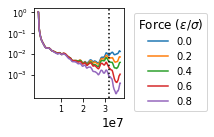

In [40]:
fig, ax = plt.subplots()

PvD_data=np.genfromtxt('PlotData/' + jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

for curfnum in range(forcenum+1):
    curforce = forces[curfnum]
    ax.plot(50000*PvD_data[0,:],PvD_data[curfnum+1,:], label=str(curforce), c = colors[curfnum])
    
ax.axvline(x=640*50000, ls = ':', color = 'k')
#ax.set_xlabel(r"Genomic Distance (bp)")
#ax.set_ylabel('Mean Contact Probability')
ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_ylim(10**-5,1.001)
ax.set_xticks([50000*200, 50000*400, 50000*600])
ax.set_yticks([1, .1, .01, .001])
ax.tick_params(axis = 'x', labelsize = 8)
ax.tick_params(axis = 'y', labelsize = 8)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
#ax.legend(title=r"Force ($\epsilon/\sigma$)")
set_size(1.25, 1.25,ax)
fig = plt.gcf()
fig.savefig('VisPlots/AllPvD_'+jobName+'.pdf', bbox_inches='tight')   

# Hi-C Difference Maps

0.9983451686886037 0.0004660052056691294
0.9983451686886037 0.0005015036378751033
0.9983451686886037 0.0004825203943644863
0.9983451686886037 0.00018298797445224975
0.9983451686886037 3.021384108307718e-05


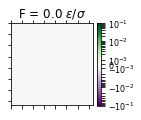

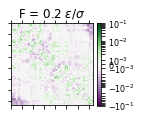

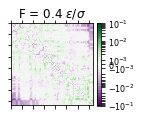

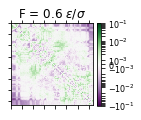

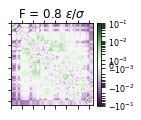

In [41]:
#Contact Maps:
AllProbs = []

NativeFName = 'CF0m_'+str(0)+'-Dist-all.dat'
NativeMap = np.genfromtxt('PlotData/'+NativeFName,dtype='f8', delimiter=' ')

for curfnum in range(forcenum+1):
    filename = 'CF0m_'+str(curfnum)+'-Dist-all.dat'
    r=np.genfromtxt('PlotData/'+filename,dtype='f8', delimiter=' ')

    print(r.max(),r.min())
    sys.stdout.flush()
    
    diffMap = r-NativeMap
    fig, ax = plt.subplots()
    #cax = ax.matshow(diffMap,cmap='seismic')
    cax = ax.matshow(diffMap,norm=mpl.colors.SymLogNorm(linthresh=10**-3, linscale=0.2, vmin=-.1, vmax=.1, base=10),cmap='PRGn')
    cbar = fig.colorbar(cax, ax = ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8) 
    curforce = round(curfnum*forcejump,4)
    ax.set_title('F = ' + str(curforce) + r' $\epsilon/\sigma$')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    set_size(1.25,1.25,ax)
    fig = plt.gcf()
    fig.savefig('VisPlots/DiffMaps/DiffMap_0m_'+str(curfnum)+'.pdf', dpi = 300, bbox_inches='tight')

#fig, ax = plt.subplots(figsize=(8,4))
# fig, ax = plt.subplots()

# PvD_data=np.genfromtxt('PlotData/' + jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

# for curfnum in range(forcenum+1):
#     curforce = forces[curfnum]
#     ax.plot(50*PvD_data[0,:],np.subtract(PvD_data[curfnum+1,:], PvD_data[1, :]), label=str(curforce), c = colors[curfnum])
    

# ax.axvline(x=640*50, ls = ':', color = 'k')
# ax.set_xlabel(r"Genomic Distance (kb)")
# ax.set_ylabel('Mean Contact Probability Difference')
# #ax.set_xscale('log')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
# #ax.legend(loc='lower right', title=r"Force ($\epsilon/\sigma$)")
# ##
# fig = plt.gcf()
# set_size(w,h,ax)
# fig.savefig('VisPlots/AllPvD_Diff_'+jobName+'.pdf', bbox_inches='tight') 

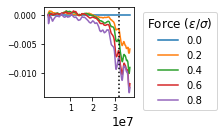

In [42]:
#fig, ax = plt.subplots(figsize=(8,4))
fig, ax = plt.subplots()

PvD_data=np.genfromtxt('PlotData/' + jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

for curfnum in range(forcenum+1):
    curforce = forces[curfnum]
    ax.plot(50000*PvD_data[0,:],np.subtract(PvD_data[curfnum+1,:], PvD_data[1, :]), label=str(curforce), c = colors[curfnum])
    

ax.axvline(x=640*50000, ls = ':', color = 'k')
#ax.set_xlabel(r"Genomic Distance (bp)")
#ax.set_ylabel('Mean Contact Probability')
#ax.set_xscale('log')
ax.set_xticks([50000*200, 50000*400, 50000*600])
ax.tick_params(axis = 'x', labelsize = 8)
ax.tick_params(axis = 'y', labelsize = 8)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
#ax.legend(loc='lower right', title=r"Force ($\epsilon/\sigma$)")
##
fig = plt.gcf()
set_size(1.25,1.25,ax)
fig.savefig('VisPlots/AllPvD_Diff_'+jobName+'.pdf', bbox_inches='tight') 

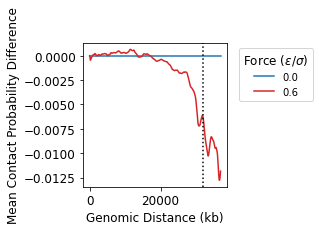

In [43]:
fig, ax = plt.subplots()

PvD_data=np.genfromtxt('PlotData/' + jobName+'-PvD-all.dat',dtype='f8', delimiter=' ')

for curfnum in MainFigForceNums:
    curforce = forces[curfnum]
    ax.plot(50*PvD_data[0,:],np.subtract(PvD_data[curfnum+1,:], PvD_data[1, :]), label=str(round(curforce,2)), c = colors[curfnum])
    
ax.set_xlabel(r"Genomic Distance (kb)")
ax.set_ylabel('Mean Contact Probability Difference')
#ax.set_xscale('log')
ax.axvline(x=640*50, ls = ':', color = 'k')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
##
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/MainPvD_Diff_'+jobName+'.pdf', bbox_inches='tight')

# Saddle Plots

In [44]:
# #Contact Maps:
# AllProbs = []
# for curfnum in range(forcenum+1):
    
#     singlejobname = makeSingleJobName(curfnum)
#     filename = 'CF0m_'+str(curfnum)+'-Dist-all.dat'
#     C1=np.genfromtxt('PlotData/'+filename,dtype='f8', delimiter=' ')
    
#     l=numBeads

#     print(r.max(),r.min())
#     sys.stdout.flush()

#     MC1 = np.zeros(np.shape(C1))
#     for i in range(0,np.shape(C1)[0]):
#         MC1+= np.diagflat(np.diag(C1,k=i)/np.nanmean(np.diag(C1,k=i)),i)
#     MC1=MC1.T+np.triu(MC1,1)
#     dC1 = pd.DataFrame(MC1)
#     #axs[0].matshow(dC1,norm=mpl.colors.LogNorm(vmin=1e-1, vmax=2),cmap="Reds")
#     cmC1 = dC1.corr()
    
#     #fig, ax = plt.subplots()
#     plt.matshow(cmC1,cmap="Reds")
    
#     np.fill_diagonal(cmC1.values,0.0)
#     eig_vals, eig_vecs = LA.eig(cmC1)
#     fig, ax = plt.subplots()
#     plt.plot(eig_vecs[:,0])
    
#     sort_eig_vecs=list(eig_vecs[:,0])
#     sort_eig_vecs.sort(key = lambda s: float(s),reverse=True)
#     fig, ax = plt.subplots()
#     plt.plot(sort_eig_vecs)

#     saddle=np.outer(sort_eig_vecs, sort_eig_vecs)
#     snmin=saddle.min()
#     snmax=saddle.max()
    
#     saddle_smooth = gaussian_filter(saddle, sigma=100)
#     fig, ax = plt.subplots()
#     sn.heatmap(saddle_smooth)
#     curforce = round(curfnum*forcejump,4)
#     ax.set_title('F = ' + str(curforce) + r' $\epsilon/\sigma$')
    
#     fig = plt.gcf()
#     fig.savefig('VisPlots/ContactMaps/Saddle_'+singlejobname+'.pdf', bbox_inches='tight')', dpi = 300, bbox_inches='tight')

# Energy Components:

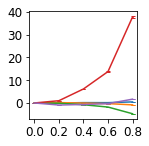

In [45]:
MeanEnergies_AllForces = []
StdEnergies_AllForces = []

for curfnum in range(forcenum+1):
    
    singlejobname = makeSingleJobName(curfnum)
    file = open('PlotData/'+singlejobname+'-MeanEnergies-AllReps.dat', 'r')
    lines = file.readlines()
    MeanEnergies = [float(num) for num in lines[1].strip().split()]
    StdEnergies = [float(num) for num in lines[2].strip().split()]
    MeanEnergies_AllForces.append(MeanEnergies)
    StdEnergies_AllForces.append(StdEnergies)

    
MeanEnergies_AllForces = np.matrix(MeanEnergies_AllForces)
StdEnergies_AllForces = np.matrix(StdEnergies_AllForces)
fig, ax = plt.subplots()

EnergyComponents = ['Bonds', 'Angles', 'Soft Core', 'Type-Type', 'Ideal Chromosome']

for index, curcomp in enumerate(EnergyComponents):
    curenergies = (np.array((MeanEnergies_AllForces[:,index]-MeanEnergies_AllForces[0,index]).T)[0])
    curstds = ((np.array(StdEnergies_AllForces[:,index])).T)[0]
    cursems = np.divide(curstds, numReps)
    ax.errorbar(forces, curenergies, yerr = cursems, label = curcomp, capsize=2)
    
# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel(r"Potential Energy ($\epsilon$)")
#ax.set_xlabel(r"Force ($\epsilon/\sigma$)")
#ax.set_title(jobName)
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticks(forces)
#fig.show()
plt.rc('xtick', labelsize=9)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9)    # fontsize of the tick labels
set_size(1.5,1.5,ax)
fig = plt.gcf()
fig.savefig('VisPlots/Energies_'+jobName+'.pdf', dpi = 300, bbox_inches='tight')

In [46]:
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels

# Bond Cosines Under Force

In [47]:
# importing the module 
import ast 
AllMeanCosDicts = [] #List of Mean Cosine Dictionaries.

for curfnum in range(forcenum+1):
    
    singlejobname = makeSingleJobName(curfnum)

    ## Open MeanCosDict Here
    curfile = 'PlotData/'+singlejobname+'MeanCosDict.txt'
    with open(curfile) as f: 
        data = f.read() 
        print("Data type before reconstruction: ", type(data)) 
        # reconstructing the data as a dictionary 
        d = ast.literal_eval(data) 
        print("Data type after reconstruction : ", type(d)) 
        #print(d)
        AllMeanCosDicts.append(d)

Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>
Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>
Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>
Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>
Data type before reconstruction:  <class 'str'>
Data type after reconstruction :  <class 'dict'>


In [48]:
#YAxis Ticks for Bond Cosines by n
tickDict = {}
yLimDict = {}

tickDict[10]= [-.2,0,.2, .4, .6, .8,1]
yLimDict[10]= [-.3, 1.05]

tickDict[20]= [-.2,0,.2, .4, .6, .8,1]
yLimDict[20]= [-.4, 1.05]

tickDict[50]= [-.2,0,.2, .4, .6, .8,1]
yLimDict[50]= [-.3, 1.05]

tickDict[100]= [-.2,0,.2, .4, .6, .8,1]
yLimDict[100]= [-.3, 1.05]

tickDict[150]= [-.2,0,.2, .4, .6, .8,1]
yLimDict[150]= [-.3, 1.05]

tickDict[200]= [-.4,-.2,0,.2, .4, .6, .8,1]
yLimDict[200]= [-.5, 1.05]

tickDict[300]= [.6, .7, .8, .9, 1]
yLimDict[300]= [.55, 1.05]

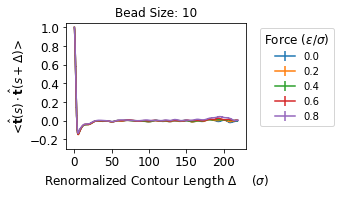

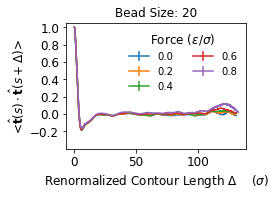

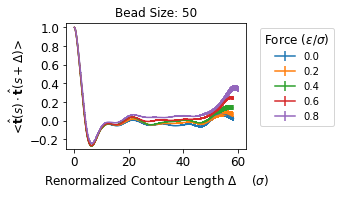

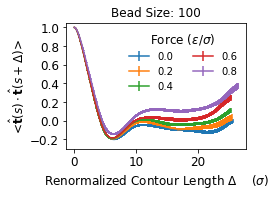

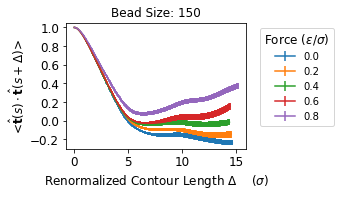

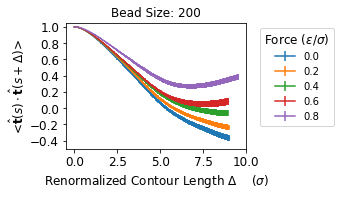

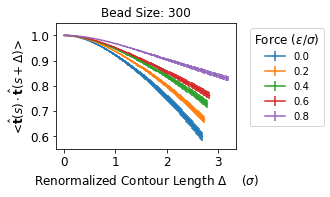

In [49]:
n_main=[20,100]
main_key_locs = ['upper right', 'upper right']

n_arr = list(AllMeanCosDicts[0].keys())

for i,n in enumerate(n_arr, start = 0):

    fig, ax = plt.subplots()
    #ax = axs[i]
    ax.set_title('Bead Size: '+ str(n))
    
    for index, force in enumerate(forces):
        MeanCosDict = AllMeanCosDicts[index]
        ax.errorbar(x=MeanCosDict[n]['len'], y=MeanCosDict[n]['cos'], yerr = MeanCosDict[n]['stdcos']/np.sqrt(numReps), label = force, c = colors[index])
        #ax.plot(MeanCosDict[n]['len'], MeanCosDict[n]['cos'], label = force, c = colors[index], marker='o', markersize=2)
        
    
    ax.set_yticks(tickDict[n])
    ax.set_ylim(yLimDict[n])
    ax.set_xlabel(r"Renormalized Contour Length $\Delta$    ($\sigma$)")
    ax.set_ylabel(r"<$\hat{\mathbf{t}}(s)\cdot \hat{\mathbf{t}}(s+\Delta)$>")
    if n in n_main:
        ax.legend(loc = main_key_locs[n_main.index(n)], frameon=False, ncol=2, title=r'Force $(\epsilon/\sigma)$')
    else:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'Force $(\epsilon/\sigma)$')    
    
    set_size(2.5,1.75,ax)
    fig = plt.gcf()
    fig.savefig('VisPlots/Cosines_B'+str(n)+'_'+jobName+'.pdf', dpi = 300, bbox_inches='tight')

# Radius of Gyration

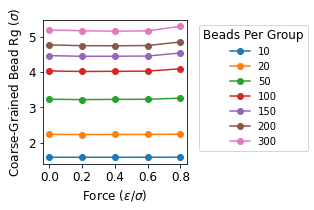

In [50]:
# Plot Rgs:
fig, ax = plt.subplots(figsize = (8,4.3))    
    
for i,n in enumerate(n_arr, start = 0):
    RG_list = []
    for index, force in enumerate(forces):
        RG_list.append(AllMeanCosDicts[index][n]['rg'])
    
    ax.plot(forces, RG_list, label = str(n), marker = 'o')

ax.set_xlabel(r'Force $(\epsilon/\sigma)$')
ax.set_ylabel(r'Coarse-Grained Bead Rg $(\sigma)$')
ax.set_xticks(forces)
ax.legend(title = 'Beads Per Group', bbox_to_anchor=(1.05, 1), loc='upper left')
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/RGs_'+jobName+'.pdf', dpi = 300, bbox_inches='tight')

## Compaction Under Force

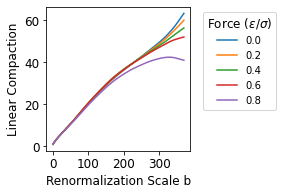

In [51]:
BondLen_Data=np.genfromtxt('PlotData/' + jobName+'-AllBondLens.dat',dtype='f8', delimiter=' ')

fig, ax = plt.subplots()

LL = len(BondLen_Data[0])
beadSizes = range(1, LL+1)
effSingleBondLens = np.divide(BondLen_Data, beadSizes)

for curfnum in range(forcenum+1):
    curforce = forces[curfnum]
    Compaction=np.divide(effSingleBondLens[curfnum,0], effSingleBondLens[curfnum,:])
    ax.plot(range(1, LL+1), Compaction, label=str(curforce), c = colors[curfnum])

ax.set_xlabel(r"Renormalization Scale b")
ax.set_xticks([0, 100, 200, 300])
ax.set_ylabel('Linear Compaction')
#ax.legend(title=r"Force ($\epsilon/\sigma$)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r"Force ($\epsilon/\sigma$)")
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/Compaction_'+jobName+'.pdf', bbox_inches='tight')    

## Combine MSD's into one plot.

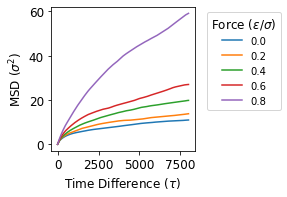

In [52]:
MSD_Data=np.genfromtxt('PlotData/'+jobName+'-MSD.dat',dtype='f8', delimiter=' ')

fig, ax = plt.subplots(figsize = (7,4))
numInd = len(MSD_Data[0])
maxInd = int(8/20*numInd)

for curfnum in range(forcenum+1):
    ax.plot(MSD_Data[0,:maxInd], MSD_Data[curfnum+1,:maxInd], label = forces[curfnum], c = colors[curfnum])
    
ax.set_xlabel(r"Time Difference ($\tau$)")
ax.set_ylabel(r"MSD ($\sigma^2$)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'Force $(\epsilon/\sigma)$')
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/MSD_'+jobName+'.pdf', bbox_inches='tight')

Mean Slope:  0.6987125205621477
STD Slope: 0.09124066681776884
Mean Intercept:  -1.175615113943556
STD Intercept: 0.11267287782364512


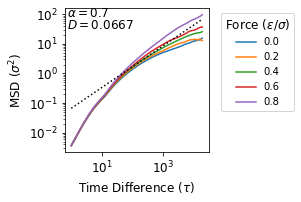

In [53]:
#fig, ax = plt.subplots(figsize = (5,4))
fig, ax = plt.subplots()
numInd = len(MSD_Data[0])
maxInd = int(numInd)
minFitInd = 30
maxFitInd = 1000
allSlopes = []
allIntercepts = []

for curfnum in range(forcenum+1):
    ax.loglog(MSD_Data[0][1:maxInd], (MSD_Data[curfnum+1][1:maxInd]), label = forces[curfnum], c = colors[curfnum])
    x = np.log10(MSD_Data[0][minFitInd:maxFitInd]).reshape((-1,1))
    y = np.log10(MSD_Data[curfnum+1][minFitInd:maxFitInd])
    model = LinearRegression()
    model.fit(x,y)
    r_sq = model.score(x,y)
    intercept = model.intercept_
    slope = float(model.coef_)
    allSlopes.append(slope)
    allIntercepts.append(intercept)
    
meanSlope = np.mean(allSlopes)
stdSlope = np.std(allSlopes)
meanIntercept=np.mean(allIntercepts)
stdIntercept = np.std(allIntercepts)
print('Mean Slope: ', meanSlope)
print('STD Slope:', stdSlope)

print('Mean Intercept: ', meanIntercept)
print('STD Intercept:', stdIntercept)

xvals = np.log10(MSD_Data[0][1:])
ax.plot(np.power(10,xvals), np.power(10,np.multiply(meanSlope,xvals)+meanIntercept), ls = ':', color = 'k')
[left,right] = ax.get_xlim()
[bottom,top] = ax.get_ylim()
ax.text(left+.1, (top+bottom)/2, s=r"$\alpha = $" + str(round(meanSlope,2)))
ax.text(left+.1, (top+bottom)/5, s=r"$D = $" + str(round(np.power(10,meanIntercept),4)))

ax.set_xlabel(r"Time Difference ($\tau$)")
ax.set_ylabel(r"MSD ($\sigma^2$)")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'Force $(\epsilon/\sigma)$')
#ax.legend(loc='lower right', title=r'Force $(\epsilon/\sigma)$')
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/MSD_loglog'+jobName+'.pdf', bbox_inches='tight')

## Make Histogram of pull coordinate and save bin edges and counts.

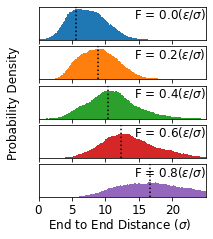

In [54]:
BinWidth = .1
maxDist = 25
Edges = np.arange(0, maxDist+BinWidth, BinWidth)

f = open('PlotData/'+jobName+"HistData.txt","r")
lines = f.readlines()
Bins = [float(num) for num in lines[0].strip().split()]
Centers = .5*np.add(Bins[1:],Bins[0:len(Bins)-1])

maxIndexHist = np.sum([cent<=maxDist for cent in Centers])

MLExts = []

f, axs = plt.subplots(
        nrows=len(forces), 
        ncols=1,
        sharex=True, 
        sharey=True,
        figsize=(3,.5*len(n_arr)),
    )

for curfnum in range(forcenum+1):
    
    BinVals = [float(num) for num in lines[curfnum+1].strip().split()]
    force = forcejump*curfnum
    
    MLExt = Centers[np.argmax(BinVals)]
    
    ax = axs[curfnum]
    ax.bar(Centers[:maxIndexHist], BinVals[:maxIndexHist], width=.1, color=colors[curfnum])
    ax.set_xlim(0, maxDist)
    ax.axes.yaxis.set_visible(False)
    ax.axvline(x=MLExt, color='black', linestyle=':')
    
    MLExts.append(Centers[np.argmax(BinVals)])
   
for curfnum in range(forcenum+1):
    ax = axs[curfnum]
    force = forces[curfnum]
    bot, top = ax.get_ylim()
    left, right = ax.get_xlim()
    ax.text(right,top,'F = ' + str(force)+r'($\epsilon/\sigma$)', ha='right', va = 'top')
    
f.text(0.5, 0, r"End to End Distance ($\sigma$)", ha='center')
f.text(-.02, 0.5, r"Probability Density", va='center', rotation='vertical')

ax.set_xticks([0, 5, 10, 15, 20])
#f.tight_layout()   
fig = plt.gcf()
fig.savefig('VisPlots/Hists_'+jobName+'.pdf', bbox_inches='tight')

In [55]:
print(MLExts)
np.savetxt('PlotData/MLExts.txt', MLExts)

[5.550000000000001, 8.95, 10.45, 12.350000000000001, 16.65]


# Mean Force Extension Curve:
Plots Mean and Standard Deviation of Pulling Coodinate at each force and saves data to text file.

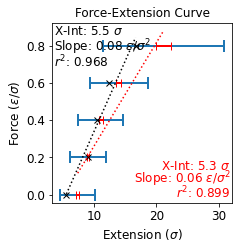

In [56]:
#first line is force
#Second Line is mean extension
#Third Line is STD
#Fourth Line is SEM
FExt_Data=np.genfromtxt('PlotData/'+jobName+'-FExtDat.dat',dtype='f8', delimiter=' ')

Forces = FExt_Data[0,:forcenum+1]
MeanExtensions = FExt_Data[1,:forcenum+1]
StdExtensions = FExt_Data[2,:forcenum+1]
SEMExtensions = FExt_Data[3,:forcenum+1]

#Linear Regression of Force Extension Curve on Mean Extensions:
x = np.array(MeanExtensions).reshape((-1,1))
y=np.array(forces)
model = LinearRegression()
model.fit(x,y)
r_sq_MeanExts = model.score(x,y)
intercept_MeanExts = model.intercept_
slope_MeanExts = float(model.coef_)
NatLen_MeanExts = float(-intercept_MeanExts/slope_MeanExts)

#Linear Regression of Force Extension Curve on MLExts:
x = np.array(MLExts).reshape((-1,1))
y=np.array(forces)
model = LinearRegression()
model.fit(x,y)
r_sq_MLExts = model.score(x,y)
intercept_MLExts = model.intercept_
slope_MLExts = float(model.coef_)
NatLen_MLExts = float(-intercept_MLExts/slope_MLExts)
    
fig, ax = plt.subplots()
ax.errorbar(MeanExtensions, forces, xerr = StdExtensions, ls='None', elinewidth=2, capsize=6, capthick=2)
ax.errorbar(MeanExtensions, forces, xerr = SEMExtensions, ls='None', elinewidth=2, capsize=4, fmt = 'r')
ax.plot(MLExts, forces, ls='None', color='black', marker='x')
ax.plot(MLExts, np.multiply(slope_MLExts,MLExts)+intercept_MLExts, ls = ':', color = 'k')
ax.plot(MeanExtensions, np.multiply(slope_MeanExts, MeanExtensions)+intercept_MeanExts, ls = ':', color = 'r')
ax.set_xlabel(r'Extension ($\sigma$)')
ax.set_ylabel(r'Force ($\epsilon/\sigma$)')
ax.set_title('Force-Extension Curve')

#Display Slope and Native Length on Plot:
left, right = ax.get_xlim()  # return the current xlim
bottom, top = ax.get_ylim()
height = top-bottom
width = right-left

ax.text((99*left+right)/100, top-.01*height, s='X-Int: ' + str(round(NatLen_MLExts, 1))+r" $\sigma$", ha = 'left', va='top')
ax.text((99*left+right)/100, top-.08*height, s='Slope: ' + str(round(slope_MLExts,2)) + r" $\epsilon/\sigma^2$", ha = 'left', va='top')
ax.text((99*left+right)/100, top-.17*height, s=r'$r^2$: ' + str(round(r_sq_MLExts, 3)), ha = 'left', va='top')

ax.text((99*right+left)/100, bottom+.17*height, s='X-Int: ' + str(round(NatLen_MeanExts, 1))+r" $\sigma$", color = 'r', ha = 'right', va='bottom')
ax.text((99*right+left)/100, bottom+.08*height, s='Slope: ' + str(round(slope_MeanExts,2)) + r" $\epsilon/\sigma^2$", color = 'r', ha = 'right', va='bottom')
ax.text((99*right+left)/100, bottom+.01*height, s=r'$r^2$: ' + str(round(r_sq_MeanExts, 3)), color = 'r', ha = 'right', va='bottom')

set_size(2.5,2.5,ax)
fig = plt.gcf()
fig.savefig('VisPlots/FExt_'+jobName+'.pdf', bbox_inches='tight')    

# Tophat Force Extension Time Courses

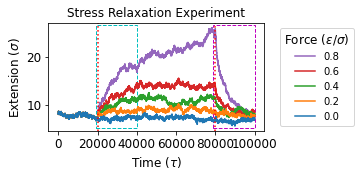

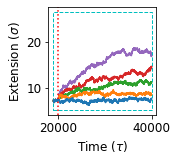

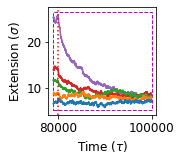

In [57]:
#First gets mean Coordinate from NoForce Simulations:
NF_Data=np.genfromtxt('PlotData/NoForce-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_nf = NF_Data[0,:]
MeanCoord_NF = NF_Data[1,:]

CFTime = dt*(len(MeanCoord_NF)-1)

#Then gets mean coordinate from each constant force simulation
MeanExts_CF_Data=np.genfromtxt('PlotData/CF-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_cf = MeanExts_CF_Data[0,:]
MeanExts_CF = []
for curfnum in range(forcenum+1):
    MeanExts_CF.append(MeanExts_CF_Data[curfnum+1,:])

RelTime = CFTime+dt*(len(MeanExts_CF[0])-1)


#Finally gets mean coordinate from relaxation experiments.
#Then gets mean coordinate from each constant force simulation
MeanExts_Rel_Data=np.genfromtxt('PlotData/Rel-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_rel = MeanExts_Rel_Data[0,:]
MeanExts_Rel = []
for curfnum in range(forcenum+1):
    MeanExts_Rel.append(MeanExts_Rel_Data[curfnum+1,:])
    
#Concatenates mean trajectories into full tophat experimental timecourses
FullMeanExts = []
for curfnum in range(forcenum+1):
    curFullMeanExt = np.hstack([MeanCoord_NF, MeanExts_CF[curfnum][1:], MeanExts_Rel[curfnum][1:]])
    FullMeanExts.append(curFullMeanExt)
    
time = np.linspace(0, dt*len(FullMeanExts[0]), len(FullMeanExts[0]), endpoint = False)
    
leadingTime = 1000
followingTime =20000 

CFIndices = range(int((CFTime-leadingTime)/dt), int((CFTime+followingTime)/dt)+1)
RelIndices = range(int((RelTime-leadingTime)/dt), int((RelTime+followingTime)/dt)+1)

#fig = plt.figure(figsize = (3,float(8)/3))
#ax = fig.add_subplot(211)

fig, ax = plt.subplots()

for i, force in reversed(list(enumerate(forces))):
    ax.plot(time, FullMeanExts[i], label = force, color = colors[i])

ax.set_xlabel(r'Time ($\tau$)')
ax.set_ylabel(r'Extension ($\sigma$)')
ax.set_title('Stress Relaxation Experiment')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=r'Force $(\epsilon/\sigma)$')

ax.axvline(x=CFTime, linestyle = ':', c='red')
ax.axvline(x=RelTime, linestyle = ':', c='red')

bottom, top = ax.get_ylim()                         
# For visualization purposes we mark the bounding boxes with rectangles
ax.add_patch(plt.Rectangle((CFTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="c", fc="None"))
ax.add_patch(plt.Rectangle((RelTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="m", fc="None"))
set_size(3,1.5,ax)

#Adds plot around force application.
#ax = fig.add_subplot(223)
fig, ax = plt.subplots()
for i, force in reversed(list(enumerate(forces))):
    ax.plot(time[CFIndices], FullMeanExts[i][CFIndices], label = force, color = colors[i])

ax.set_xlabel(r'Time ($\tau$)')
ax.set_ylabel(r'Extension ($\sigma$)')
ax.add_patch(plt.Rectangle((CFTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="c", fc="None"))
ax.axvline(x=CFTime, linestyle = ':', c='red')
set_size(1.5,1.5,ax)
          
#Adds plot around force application.
#ax = fig.add_subplot(224)
fig, ax = plt.subplots()
for i, force in reversed(list(enumerate(forces))):
    ax.plot(time[RelIndices], FullMeanExts[i][RelIndices], label = force, color = colors[i])

ax.set_xlabel(r'Time ($\tau$)')
ax.set_ylabel(r'Extension ($\sigma$)')
ax.add_patch(plt.Rectangle((RelTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="m", fc="None"))
ax.axvline(x=RelTime, linestyle = ':', c='red')
set_size(1.5,1.5,ax)
fig = plt.gcf()
fig.savefig('VisPlots/Tophat_'+jobName+'.pdf', bbox_inches='tight')

## Exponential Curve Fitting:

$$y = A + B*e^{-\frac{t}{c}}$$

In [58]:
# Exponential Curve Fitting

# Function to calculate the exponential with constants a and b
#a is initial length
#b is final length
#C is time constant for decay.
def exponential(x, a, b, c):
    return b+(a-b)*np.exp(-x/c)

/Users/BenRuben1/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


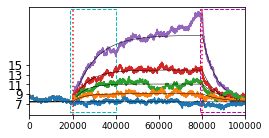

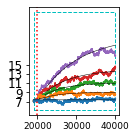

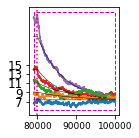

In [59]:
blackWidth=.5

#First gets mean Coordinate from NoForce Simulations:
NF_Data=np.genfromtxt('PlotData/NoForce-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_nf = NF_Data[0,:]
MeanCoord_NF = NF_Data[1,:]
FitCoord_NF = np.array([MeanExtensions[0] for _ in MeanCoord_NF])

CFTime = dt*(len(MeanCoord_NF)-1)

#Parameters for CF curve fitting
allFitParams_CF = []

#Then gets mean coordinate from each constant force simulation
MeanExts_CF_Data=np.genfromtxt('PlotData/CF-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_cf = MeanExts_CF_Data[0,:]
MeanExts_CF = []
FitExts_CF = []
for curfnum in range(forcenum+1):
    MeanExts_CF.append(MeanExts_CF_Data[curfnum+1,:])
    pars, cov = curve_fit(f=(lambda x, c: exponential(x, MeanExtensions[0], MeanExtensions[curfnum], c)), xdata=time_cf, ydata=MeanExts_CF[curfnum], p0=[1000], bounds=(-np.inf, np.inf))
    FitExts_CF.append(exponential(time_cf, MeanExtensions[0], MeanExtensions[curfnum], pars))
    allFitParams_CF.append(pars)
    
RelTime = CFTime+dt*(len(MeanExts_CF[0])-1)


#Finally gets mean coordinate from relaxation experiments.
#Then gets mean coordinate from each constant force simulation
MeanExts_Rel_Data=np.genfromtxt('PlotData/Rel-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_rel = MeanExts_Rel_Data[0,:]
MeanExts_Rel = []
FitExts_Rel = []
allFitParams_Rel = []
for curfnum in range(forcenum+1):
    MeanExts_Rel.append(MeanExts_Rel_Data[curfnum+1,:])
    pars, cov = curve_fit(f=(lambda x, c: exponential(x, MeanExtensions[curfnum], MeanExtensions[0], c)), xdata=time_rel, ydata=MeanExts_Rel[curfnum], p0=[1000], bounds=(-np.inf, np.inf))
    FitExts_Rel.append(exponential(time_rel, MeanExtensions[curfnum], MeanExtensions[0], pars))
    allFitParams_Rel.append(pars)
    
#Concatenates mean trajectories into full tophat experimental timecourses
FullMeanExts = []
FullFitExts = []
for curfnum in range(forcenum+1):
    curFullMeanExt = np.hstack([MeanCoord_NF, MeanExts_CF[curfnum][1:], MeanExts_Rel[curfnum][1:]])
    FullMeanExts.append(curFullMeanExt)
    curFitMeanExt = np.hstack([FitCoord_NF, FitExts_CF[curfnum][1:], FitExts_Rel[curfnum][1:]])
    FullFitExts.append(curFitMeanExt)
    
time = np.linspace(0, dt*len(FullMeanExts[0]), len(FullMeanExts[0]), endpoint = False)
    
leadingTime = 1000
followingTime =20000 

CFIndices = range(int((CFTime-leadingTime)/dt), int((CFTime+followingTime)/dt)+1)
RelIndices = range(int((RelTime-leadingTime)/dt), int((RelTime+followingTime)/dt)+1)

#fig = plt.figure(figsize = (9,8))

#ax = fig.add_subplot(211)
fig, ax = plt.subplots()
ax.set_yticks([7,9,11,13,15])
ax.tick_params(axis = 'x', labelsize = 9)
for i, force in reversed(list(enumerate(forces))):
    ax.plot(time, FullMeanExts[i], label = force, color = colors[i])
    ax.plot(time, FullFitExts[i], color='black', linewidth=blackWidth)

ax.set_xlim([0, 100000])
#ax.set_xlabel(r'Time ($\tau$)')
#ax.set_ylabel(r'Extension ($\sigma$)')
#ax.set_title('Stress Relaxation Experiment')
#ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', title=r'Force $(\epsilon/\sigma)$')

ax.axvline(x=CFTime, linestyle = ':', c='red')
ax.axvline(x=RelTime, linestyle = ':', c='red')

bottom, top = ax.get_ylim()                         
# For visualization purposes we mark the bounding boxes with rectangles
ax.add_patch(plt.Rectangle((CFTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="c", fc="None"))
ax.add_patch(plt.Rectangle((RelTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="m", fc="None"))
set_size(3,1.5, ax)
fig = plt.gcf()
fig.savefig('VisPlots/Tophat_Fit_'+jobName+'.pdf', bbox_inches='tight')

#Adds plot around force application.
#ax = fig.add_subplot(223)
fig, ax = plt.subplots()
ax.set_yticks([7,9,11,13,15])
ax.tick_params(axis = 'x', labelsize = 9)
for i, force in reversed(list(enumerate(forces))):
    ax.plot(time[CFIndices], FullMeanExts[i][CFIndices], label = force, color = colors[i])
    ax.plot(time[CFIndices], FullFitExts[i][CFIndices], color = 'black', linewidth=blackWidth)

#ax.set_xlabel(r'Time ($\tau$)')
#ax.set_ylabel(r'Extension ($\sigma$)')
ax.add_patch(plt.Rectangle((CFTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="c", fc="None"))
ax.axvline(x=CFTime, linestyle = ':', c='red')
set_size(1.25, 1.5, ax)
fig = plt.gcf()
fig.savefig('VisPlots/Onset_Fit_'+jobName+'.pdf', bbox_inches='tight')

#Adds plot around force release.
#ax = fig.add_subplot(224)
fig, ax = plt.subplots()
ax.set_yticks([7,9,11,13,15])
ax.tick_params(axis = 'x', labelsize = 9)
for i, force in reversed(list(enumerate(forces))):
    ax.plot(time[RelIndices], FullMeanExts[i][RelIndices], label = force, color = colors[i])
    ax.plot(time[RelIndices], FullFitExts[i][RelIndices], color = 'black', linewidth=blackWidth)

#ax.set_xlabel(r'Time ($\tau$)')
#ax.set_ylabel(r'Extension ($\sigma$)')
ax.add_patch(plt.Rectangle((RelTime-leadingTime, bottom+0.5), (followingTime+leadingTime), top-bottom-1, ls="--", ec="m", fc="None"))
ax.axvline(x=RelTime, linestyle = ':', c='red')
set_size(1.25, 1.5, ax)
fig = plt.gcf()
fig.savefig('VisPlots/release_Fit_'+jobName+'.pdf', bbox_inches='tight')


#fig = plt.gcf()
#fig.savefig('VisPlots/Tophat_Fit_'+jobName+'.pdf', bbox_inches='tight')

For Force 0.2 ($\frac{\epsilon}{\sigma}$), $\tau$ = 4941.352664090603 Release: 8531.475283591408
For Force 0.4 ($\frac{\epsilon}{\sigma}$), $\tau$ = 5395.947332747728 Release: 8703.24812544199
For Force 0.6 ($\frac{\epsilon}{\sigma}$), $\tau$ = 7139.044313296247 Release: 5829.06860733071
For Force 0.8 ($\frac{\epsilon}{\sigma}$), $\tau$ = 10099.702703235136 Release: 6398.999649592355

Spring constant k = 0.85
For Force 0.2 ($\\frac{\\epsilon}{\\sigma}$), $\\eta$ = 373.5269243510289 Release: 644.9116141851416
For Force 0.4 ($\\frac{\\epsilon}{\\sigma}$), $\\eta$ = 407.8906623703474 Release: 657.8962735821029
For Force 0.6 ($\\frac{\\epsilon}{\\sigma}$), $\\eta$ = 539.6549176766786 Release: 440.6311827427691
For Force 0.8 ($\\frac{\\epsilon}{\\sigma}$), $\\eta$ = 763.4571227863329 Release: 483.7134324383284


Mean Viscosity Upon Force Application: 521.1324067960969
Mean Viscosity Upon Release: 556.7881257370856
Mean of All Viscosity Measurements: 538.9602662665912

To Maintain Quasistati

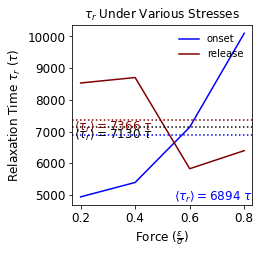

In [60]:
relaxColors = ['blue', 'maroon']

NatLen = NatLen_MeanExts

taus_CF = []
taus_Rel = []
for i, force in enumerate(forces[1:], start=1):
    print(r"For Force " + str(force) + r" ($\frac{\epsilon}{\sigma}$), $\tau$ = " + str(allFitParams_CF[i][0]) + ' Release: ' +str(allFitParams_Rel[i][0]))
    taus_CF.append(allFitParams_CF[i][0])
    taus_Rel.append(allFitParams_Rel[i][0])
    
MeanTauOnset = np.mean(taus_CF)
MeanTauRel = np.mean(taus_Rel)
MeanTauAll = np.mean([taus_CF,taus_Rel])
    
print('\nSpring constant k = ' + str(round(slope,2)))

Viscosities_app={}
Viscosities_rel = {}

for i, force in enumerate(forces[1:], start=1):
    Viscosities_app[force]=(slope_MLExts*allFitParams_CF[i][0])
    Viscosities_rel[force]=(slope_MLExts*allFitParams_Rel[i][0])
    
for i, force in enumerate(forces[1:], start=1):
    print(r"For Force " + str(force) + r" ($\\frac{\\epsilon}{\\sigma}$), $\\eta$ = " + str(Viscosities_app[force]) + ' Release: ' +str(Viscosities_rel[force])) 
    
    
fig, ax = plt.subplots()
ax.set_title(r"$\tau_r$ Under Various Stresses")
ax.set_xlabel(r'Force ($\frac{\epsilon}{\sigma}}$)')
ax.set_ylabel(r'Relaxation Time $\tau_r$ ($\tau$)')
ax.plot(forces[1:], taus_CF, label = 'onset', color = 'blue')
ax.plot(forces[1:], taus_Rel, label = 'release', color = 'maroon')

[left, right] = ax.get_xlim()
[bottom, top] = ax.get_ylim()

ax.axhline(y=MeanTauOnset, ls = ':', color = 'blue')
#ax.text((99*left+right)/100, MeanTauOnset, s=r'$\langle \tau_{r} \rangle = $'+ str(round(MeanTauOnset))+r" $\tau$", color = 'blue',horizontalalignment = 'left', verticalalignment='top')
ax.text(right, bottom, s=r'$\langle \tau_{r} \rangle = $'+ str(round(MeanTauOnset))+r" $\tau$", color = 'blue',horizontalalignment = 'right', verticalalignment='bottom')


ax.axhline(y = MeanTauRel, ls = ':', color = 'maroon')
ax.text((99*left+right)/100, MeanTauRel, s=r'$\langle \tau_{r} \rangle = $'+ str(round(MeanTauRel))+r" $\tau$", color = 'maroon',horizontalalignment = 'left', verticalalignment='top')

ax.axhline(y=MeanTauAll, ls = ':', color = 'black')
ax.text((99*left+right)/100, MeanTauAll, s=r'$\langle \tau_{r} \rangle = $'+ str(round(MeanTauAll))+r" $\tau$", color = 'black',horizontalalignment = 'left', verticalalignment='top')

##
#ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
ax.legend(loc = 'upper right', frameon=False)
set_size(2.5,2.5,ax)

fig.savefig('VisPlots/RelaxTimes_'+jobName+'.pdf', bbox_inches='tight')

print('\n')

meanViscosity_app = np.mean([Viscosities_app[force] for force in forces[1:]])
meanViscosity_rel = np.mean([Viscosities_rel[force] for force in forces[1:]])
meanViscosity_all = .5*(meanViscosity_app+meanViscosity_rel)
print('Mean Viscosity Upon Force Application: ' + str(meanViscosity_app))
print('Mean Viscosity Upon Release: ' + str(meanViscosity_rel))
print('Mean of All Viscosity Measurements: ' + str(meanViscosity_all))

velEq = 0.1*NatLen*slope/meanViscosity_all

print('\nTo Maintain Quasistatic Equilibrium, use velocity less than: ' + str(velEq))


## Make Tophat Force Demonstration Graph

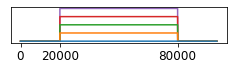

In [61]:
#First gets mean Coordinate from NoForce Simulations:
NF_Data=np.genfromtxt('PlotData/NoForce-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_nf = NF_Data[0,:]
force_nf =0*time_nf

#Then gets mean coordinate from each constant force simulation
MeanExts_CF_Data=np.genfromtxt('PlotData/CF-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_cf = MeanExts_CF_Data[0,:]

Forces_CF = []
for curfnum in range(forcenum+1):
    Forces_CF.append(0*time_cf+(forces[curfnum]))

#Finally gets mean coordinate from relaxation experiments.
#Then gets mean coordinate from each constant force simulation
MeanExts_Rel_Data=np.genfromtxt('PlotData/Rel-'+jobName+'-MeanExtTrace.dat',dtype='f8', delimiter=' ')
time_rel = MeanExts_Rel_Data[0,:]
Forces_Rel = []
for curfnum in range(forcenum+1):
    Forces_Rel.append(0*time_rel)
    
#Concatenates mean trajectories into full tophat experimental timecourses
FullForces = []
for curfnum in range(forcenum+1):
    curFullForce = np.hstack([force_nf, Forces_CF[curfnum][1:], Forces_Rel[curfnum][1:]])
    FullForces.append(curFullForce)
    
time = np.linspace(0, dt*len(FullForces[0]), len(FullForces[0]), endpoint = False)
    
fig, ax = plt.subplots()

for i, force in reversed(list(enumerate(forces))):
    ax.plot(time, FullForces[i], color = colors[i])
ax.axes.yaxis.set_visible(False)
ax.set_xticks([0,20000, 80000])
set_size(3,.5, ax)    
fig.savefig('VisPlots/Force_Demonstration_'+jobName+'.pdf', bbox_inches='tight')

#ax.set_xlabel(r'Time ($\tau$)')
#ax.set_ylabel(r'Force ($\epsilon/\sigma$)')
#ax.set_title('Tophat Force')

## Radius Measurement

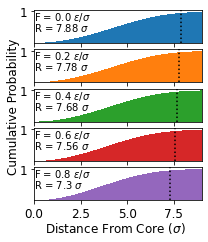

In [62]:
BinWidth = .01
maxDist = 9 

f = open('PlotData/'+jobName+"-RadHist-Allreps.dat","r")
lines = f.readlines()
Bins = [float(num) for num in lines[0].strip().split()]
Centers = .5*np.add(Bins[1:],Bins[0:len(Bins)-1])

maxIndexHist = np.sum([cent<=maxDist for cent in Centers])

Radii = []

f, axs = plt.subplots(
        nrows=len(forces), 
        ncols=1,
        sharex=True, 
        sharey=True,
        figsize=(3,.5*len(n_arr)),
    )

#fig.subplots_adjust(hspace=.2)

for curfnum in range(forcenum+1):
    
    BinVals = [float(num) for num in lines[curfnum+1].strip().split()]
    force = forcejump*curfnum
    
    CumBinVals = np.multiply(BinWidth, np.cumsum(BinVals))
    radius = Centers[np.argmin(np.abs(CumBinVals-.95))]
    Radii.append(radius)
    
    ax = axs[curfnum]
    ax.bar(Centers[:maxIndexHist], CumBinVals[:maxIndexHist], width=BinWidth, color=colors[curfnum])
    ax.set_xlim(0, maxDist)
    ax.axvline(x=radius, color='black', linestyle=':')
    ax.set_yticks([1])
    
for curfnum in range(forcenum+1):
    ax = axs[curfnum]
    force = forces[curfnum]
    radius = Radii[curfnum]
    bot, top = ax.get_ylim()
    ax.text(0,top,'F = ' + str(force)+r' $\epsilon/\sigma$', ha='left', va = 'top', size = 10)
    ax.text(0,top-.35,'R = ' + str(round(radius,2))+r' $\sigma$', ha='left', va = 'top', size=10)
       
f.text(0.5, 0, r"Distance From Core ($\sigma$)", ha='center')
f.text(0, 0.5, r"Cumulative Probability", va='center', rotation='vertical')
#f.tight_layout()  
fig = plt.gcf()
fig.savefig('VisPlots/CumRadHists_'+jobName+'.pdf', bbox_inches='tight')

In [63]:
#Linear Regression of Radius vs Extension Curve:
x = np.array(MeanExtensions/MeanExtensions[0]-1).reshape((-1,1))
y=np.array(Radii/Radii[0]-1)
model = LinearRegression()
model.fit(x,y)
r_sq = model.score(x,y)
intercept = model.intercept_
slope = float(model.coef_)

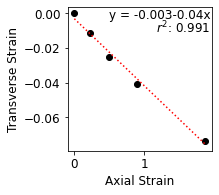

In [64]:
fig, ax = plt.subplots()
ax.plot(x, y, color = 'k', marker = 'o', ls = 'none')
ax.plot(x, model.predict(x), ls = ':', color = 'r')
ax.set_xlabel(r'Axial Strain')
ax.set_ylabel(r'Transverse Strain')

SlopeRounded = round(slope,2)
rsq_rounded = round(r_sq,3)
intercept_rounded = round(intercept, 3)

#Display Slope and Native Length on Plot:
left, right = ax.get_xlim()  # return the current xlim
bottom, top = ax.get_ylim()
height = top-bottom
width = right-left


ax.text(right-.01*width, top-.01*height, s='y = ' + str(intercept_rounded)+ str(SlopeRounded)+'x', horizontalalignment='right', va='top' )#+ r" $\epsilon/\sigma^2$")
ax.text(right-.01*width, top-.09*height, s=r'$r^2$: ' + str(rsq_rounded), horizontalalignment='right', va='top')
#ax.set_xticks([0, .15, .3, .45])
set_size(w,h,ax)
fig = plt.gcf()
fig.savefig('VisPlots/RadExt_'+jobName+'.pdf', bbox_inches='tight')

# Calculate Viscosity, Elastic Modulus

In [65]:
print('Mean Viscosity: ' + str(meanViscosity_all))

youngMod = slope_MLExts*NatLen_MLExts/(np.pi*Radii[0]**2)
print('Young\'s modulus: ' + str(youngMod))

Mean Viscosity: 538.9602662665912
Young's modulus: 0.0021333610246661557
